### Linear model, a special case of GLM
- fit a linear model two ways, one using the ols() function and one using the glm() function. This will show how a linear model is a special case of a generalized linear model (GLM). 
- `ols(formula = 'y ~ X', data = my_data).fit() `
- `glm(formula = 'y ~ X', data = my_data, family = sm.families.___).fit()`

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

In [3]:
salary = pd.read_csv('data/salary.csv')
salary.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Fit a linear model
model_lm = ols(formula = 'Salary ~ Experience',
               data = salary).fit()

# View model coefficients
print(model_lm.params)

Intercept     25792.200199
Experience     9449.962321
dtype: float64


- Fit a GLM using the same formula and data, as for the linear model, but this time include the Gaussian() family as additional input

In [5]:
# Fit a GLM
model_glm = glm(formula = 'Salary ~ Experience',
                data = salary,
                family = sm.families.Gaussian()).fit()

# View model coefficients
print(model_glm.params)

Intercept     25792.200199
Experience     9449.962321
dtype: float64


- Looking at the coefficient estimates, both models give the same values.

### Data type and distribution family
- review the data types and apply the correct distribution family to fit a GLM.
- Consider a study in which you are trying to predict the number of bike crossings over the Brooklyn bridge in New York City given daily temperature. 

In [6]:
bike = pd.read_csv('data/bike.csv')
bike.head()

,Avg_Temp,Brooklyn_B,Total_Crossings
0,72.05,1704.0,11497
1,51.95,827.0,6922
2,36.95,526.0,4759
3,38.60,521.0,4335
4,34.10,1416.0,9471


#### Poisson
- visualize the data using the scatterplot

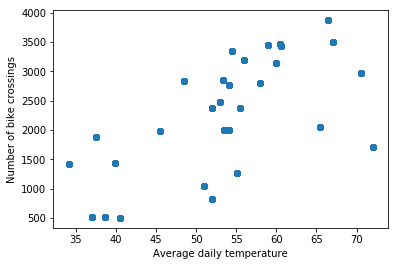

In [8]:
import matplotlib.pyplot as plt
plt.scatter(bike['Avg_Temp'], bike['Brooklyn_B'])
plt.xlabel('Average daily temperature')
plt.ylabel('Number of bike crossings')
plt.show()

- We decide to fit a GLM model. Now considering the response, the number of bike crossings, which distribution family would we consider for fitting a GLM model? --> **Poisson()**

#### Binomial
- Suppose we are working on a study helping banks approve loans and we are assigned to develop a model which would predict the probability of a default of a customer, i.e. if the bank grants a loan to a customer what is the probability that customer will not repay the loan. We want to predict the probability of default using Age of the customer.


1. Default: Default (Yes = 1/No = 0)
2. Credit_Amount: Credit amount


- Visualize the data

In [9]:
default = pd.read_csv('data/default.csv')
default.head()

,Default,Duration,Credit_Amount,Age
0,0,6,1169,67
1,1,48,5951,22
2,0,12,2096,49
3,0,42,7882,45
4,1,24,4870,53


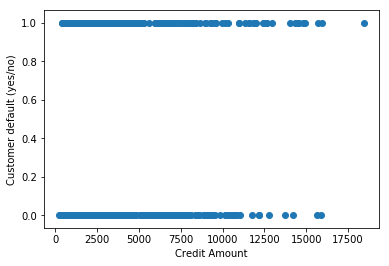

In [10]:
plt.xlabel('Credit Amount')
plt.ylabel('Customer default (yes/no)')
plt.scatter(default['Credit_Amount'], default['Default'])
plt.show()

- Considering the response, the event of a default, which distribution family you would consider for fitting a GLM model? -> **Binomial**

#### Gaussian

- suppose we are working on a study and would like to predict insurance costs given the BMI of the individual. Looking at the dataset ìnsurance we note there are three variables:

- age: age of primary beneficiary
- bmi: Body mass index
- charges: Individual medical costs billed by health insurance


In [11]:
insurance = pd.read_csv('data/insurance.csv')
insurance.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


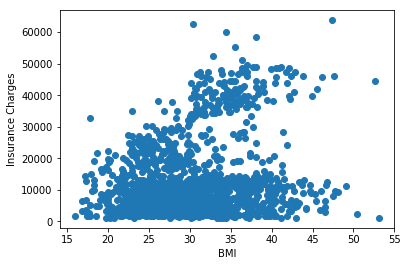

In [12]:
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.scatter(insurance['bmi'], insurance['charges'])
plt.show()

- Considering the response, the insurance charge, which distribution family we would consider for fitting a GLM model? -> **Gaussian**

#### Linear model and a binary response variable
- given the linear line fit, we can obtain fitted values y^, which are not in line with the logic of the problem since the response variable takes on values 0 and 1.
- Using the crab dataset, we will study this effect by modeling y as a function of x using the GLM framework.
-  recall that a GLM with:
- the Gaussian family is a linear model (a special case of GLMs)
- the Binomial family is a logistic regression model.

In [13]:
crab = pd.read_csv('data/crab.csv')
crab.head()

,crab,sat,y,weight,width,color,spine,width_C
0,1,8,1,3.05,28.3,2,3,"[28.25, 29.25)"
1,2,0,0,1.55,22.5,3,3,"[0.0, 23.25)"
2,3,9,1,2.30,26.0,1,1,"[25.25, 26.25)"
3,4,0,0,2.10,24.8,3,3,"[24.25, 25.25)"
4,5,4,1,2.60,26.0,3,3,"[25.25, 26.25)"


- To fit a linear model using GLM formula, use Gaussian() for the family argument which assumes y is continuous and approximately normally distributed.
- To fit a logistic model using GLM formula, use Binomial() for the family argument.
- Using the crab dataset, define the model formula so that **y is predicted by width.**

In [15]:
# Define model formula
formula = 'y ~ width'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = crab, family = family_LM).fit()
print(model_LM.summary())

# Define and fit a logistic regression model
model_GLM = glm(formula = formula, data = crab, family = family_GLM).fit()
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.19515
Method:                          IRLS   Log-Likelihood:                -103.13
Date:                Wed, 10 Jun 2020   Deviance:                       33.371
Time:                        00:34:55   Pearson chi2:                     33.4
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7655      0.421     -4.190      0.000      -2.591      -0.940
width          0.0915      0.016      5.731      0.0

- **Observation** : Defining model formula should look familiar from linear regression. In GLMs we have to pay special attention to the `family` argument which specifies the probability distribution of the response.

### Comparing predicted values
- We have fitted both a linear and a GLM (logistic) regression model using crab data, predicting ywith width. In other words, we wanted to predict the probability that the female has a satellite crab nearby given her width.
- examine the estimated probabilities (the output) from the two models and try to deduce if the linear fit would be suitable for the problem at hand.
- The usual practice is to test the model on new, unseen, data. Such dataset is called test sample.

In [17]:
test = pd.DataFrame({'y':[0,0,1,1,1] , 'width':[17.8,24.6,28.1,32.0,33.7]})
test.head()

,y,width
0,0,17.8
1,0,24.6
2,1,28.1
3,1,32.0
4,1,33.7


In [19]:
# View test set
# print(test)

# Compute estimated probabilities for linear model: pred_lm
pred_lm = model_LM.predict(test)

# Compute estimated probabilities for GLM model: pred_glm
pred_glm = model_GLM.predict(test)

# Create dataframe of predictions for linear and GLM model: predictions
predictions = pd.DataFrame({'Pred_LM': pred_lm, 'Pred_GLM': pred_glm})

# Concatenate test sample and predictions and view the results
all_data = pd.concat([test, predictions], axis = 1)
print(all_data)

   y  width   Pred_LM  Pred_GLM
0  0   17.8 -0.136287  0.029309
1  0   24.6  0.486122  0.470299
2  1   28.1  0.806480  0.834983
3  1   32.0  1.163450  0.972363
4  1   33.7  1.319052  0.987941


- **Conclusion** : Comparing the predicted values for both models, the GLM model provides values within the (0,1) range as is required by the binary response variable.

### Model fitting step-by-step
- The columns in the dataset are:


1. switch: 1 if the change of the current well occurred; 0 otherwise
2. arsenic: The level of arsenic contamination in the well
3. distance: Distance to the closest known safe well
4. education: Years of education of the head of the household


In [20]:
wells = pd.read_csv('data/wells.csv')
wells.head()

,switch,arsenic,distance,assoc,education,distance100,education4
0,1,2.36,16.826000,0,0,0.16826,0
1,1,0.71,47.321999,0,0,0.47322,0
2,0,2.07,20.966999,0,10,0.20967,2
3,1,1.15,21.486000,0,12,0.21486,2
4,1,1.10,40.874001,1,14,0.40874,3


- Create a regression formula where switch is predicted by distance100

In [21]:
# Define the formula the the logistic model
model_formula = 'switch ~ distance100'

- Define the link function using `logit` for the `Binomial` distribution.

In [22]:
# Define the correct probability distribution and the link function of the response variable
link_function = sm.families.links.logit
model_family = sm.families.Binomial(link = link_function)

- fit the model using the glm() with the previously defined formula and family.

In [24]:
# Fit the model
wells_fit = glm(formula = model_formula, 
                 data = wells, 
                 family = model_family).fit()

- We have defined the components of the GLM and fit your first GLM model.

### Results of the model fit using summary()
- The second step after fitting the model is to examine the model results. To do this we will use the `.summary()` function, which provides an overview of the model coefficients and how well they fit, along with several other statistical measures. 

In [25]:
# View the results of the wells_fit model
print(wells_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.6
Date:                Wed, 10 Jun 2020   Deviance:                       4061.3
Time:                        01:49:51   Pearson chi2:                 3.01e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6108      0.060     10.104      0.000       0.492       0.729
distance100    -0.6291      0.098     -6.446     

### Extracting parameter estimates
- Coefficient estimates are generally of main interest in a regression model.
- extract the coefficients from the model object.
- The attribute `.params` contains the coefficients of the fitted model, starting with the intercept value. To compute a 95% confidence interval for the coefficients we can use the method `.conf_int()` of the fitted model wells_fit.

In [26]:
# Extract coefficients from the fitted model wells_fit
intercept, slope = wells_fit.params

# Print coefficients
print('Intercept =', intercept)
print('Slope =', slope)

# Extract and print confidence intervals
print(wells_fit.conf_int())

Intercept = 0.6108118803818956
Slope = -0.6290808479557681
                    0         1
Intercept    0.492327  0.729297
distance100 -0.820345 -0.437816


- Now we have a working knowledge of how to fit a model and extract coefficients. Are the coefficients within the confidence intervals?